In [1]:
import datetime
from utils.data_processing import (
    load_dataset, 
    display_dataset_description, 
    remove_duplicates_and_empty_rows,
    check_if_column_is_unique_per_row,
    BRONZE_PATH,
    GROUP_FILENAME,
    POSTS_FILENAME
)
from utils.data_visualization import (
    analyse_categorical_features,
    analyse_numerical_features
)

In [2]:
group_df_raw = load_dataset(filepath=BRONZE_PATH + GROUP_FILENAME)
posts_df_raw = load_dataset(filepath=BRONZE_PATH + POSTS_FILENAME)

# Exploratory Data Analysis:

In this notebook analysis of initial (_bronze_ layer) datasets will be conducted. Based on the research done, necessary transformations
will be defined to load data to _silver_ layer.

Main purposes of the preformed EDA:
1. Define proper type for each feature.
2. Clean datasets if there exists duplicated or completely empty rows.
3. Check dependencies between two datasets.
4. Investigate distribution, anomalies and empty values for categorical features.
5. Investigate distribution, anomalies and empty values for numerical features.
6. Explore behaviour of numerical features within category.
7. Explore correlations between numerical features. 
9. Define strategies of empty values handling for each feature.
10. Common scence questions.

## Feature types:

### Investigation:

Sample values:

In [3]:
group_df_raw

,post_id,group_name
0,1,groupE
1,2,groupC
2,3,groupC
3,4,groupD
4,5,groupE
...,...,...
19995,19996,groupB
19996,19997,groupD
19997,19998,groupA
19998,19999,groupC


In [4]:
posts_df_raw

,post_id,post_date,post_type,reach,click,likes,comments,share,reaction
0,1,2024-01-10,article,848706,67896,59409.0,241,37,384
1,2,2024-02-06,short,7927,476,317.0,284,72,16
2,3,2024-01-18,short,8326,666,167.0,252,32,50
3,4,2024-02-11,short,4039,162,40.0,149,87,487
4,5,2024-03-13,promo,496568,39725,14897.0,57,7,271
...,...,...,...,...,...,...,...,...,...
19995,19996,2024-01-01,article,844,51,68.0,71,100,257
19996,19997,2024-01-14,short,4139,331,83.0,275,70,295
19997,19998,2024-01-15,article,457,41,18.0,155,71,281
19998,19999,2024-01-03,short,92,6,7.0,156,40,379


List of features and their types:

In [5]:
group_df_raw.dtypes

post_id        int64
group_name    object
dtype: object

In [6]:
posts_df_raw.dtypes

post_id        int64
post_date     object
post_type     object
reach          int64
click          int64
likes        float64
comments       int64
share          int64
reaction       int64
dtype: object

### Conclusion:

According to the information above, following schemas will be applied to the datasets for proper types handling:

In [7]:
group_df_schema = {
    "post_id" : int,
    "group_name" : str
}

In [8]:
posts_df_schema = {
    "post_id" : int,
    "post_date" : object,
    "post_type" : str,
    "reach" : int,
    "click" : int,
    "likes" : float,
    "comments" : int,
    "share" : int,
    "reaction" : int
}

Reloading datasets with proper data types applied:

In [9]:
group_df_converted_types = load_dataset(BRONZE_PATH + GROUP_FILENAME, dtype=group_df_schema)
posts_df_converted_types = load_dataset(BRONZE_PATH + POSTS_FILENAME, dtype=posts_df_schema, parse_dates=["post_date"], date_format="%Y-%m-%d")

## Empty and duplicated rows:

### Investigation:

Removing completely empty and duplicated rows, and cheking how many rows were removed

In [10]:
group_df_cleaned_rows = remove_duplicates_and_empty_rows(group_df_converted_types, "GROUP_DF")
posts_df_cleaned_rows = remove_duplicates_and_empty_rows(posts_df_converted_types, "POSTS_DF")

For dataset 'GROUP_DF':
Number of duplicated rows: 0.
Number of empty rows: 0. 

For dataset 'POSTS_DF':
Number of duplicated rows: 0.
Number of empty rows: 0. 



### Conclusion:

There are no duplicates or empty rows, what cannot but please.

## Dependencies between datasets:

### Investigation:

Checking whether `post_id` is a PK for both datasets

In [11]:
check_if_column_is_unique_per_row(group_df_cleaned_rows, "post_id")

True

In [12]:
check_if_column_is_unique_per_row(posts_df_cleaned_rows, "post_id")

True

Comparing values of `post_id` from each dataset

In [13]:
group_post_ids = sorted(group_df_cleaned_rows["post_id"].to_list())
posts_post_ids = sorted(posts_df_cleaned_rows["post_id"].to_list())

group_post_ids == posts_post_ids

True

### Conclusion:

Column `post_id` is unique per row for each dataset and can be treated as PK for each table. Moreover relation between two enteties is one-to-one.

## Categorical features analysis:

Displaying counts and number of empty values for categorical features

Counts for group_name:
group_name
groupD    4074
groupE    4064
groupC    4027
groupB    3952
groupA    3883
Name: count, dtype: int64



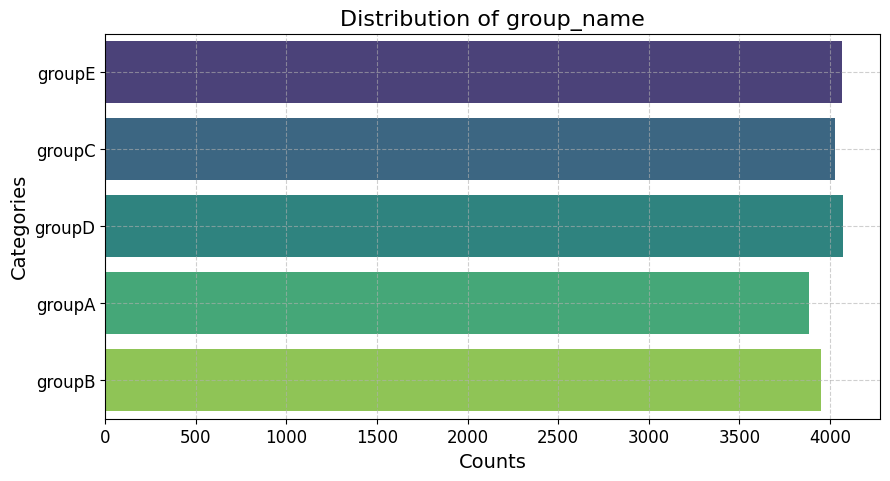

No missing values in group_name.



In [14]:
analyse_categorical_features(group_df_cleaned_rows)

Counts for post_type:
post_type
short      6832
promo      6649
article    6519
Name: count, dtype: int64



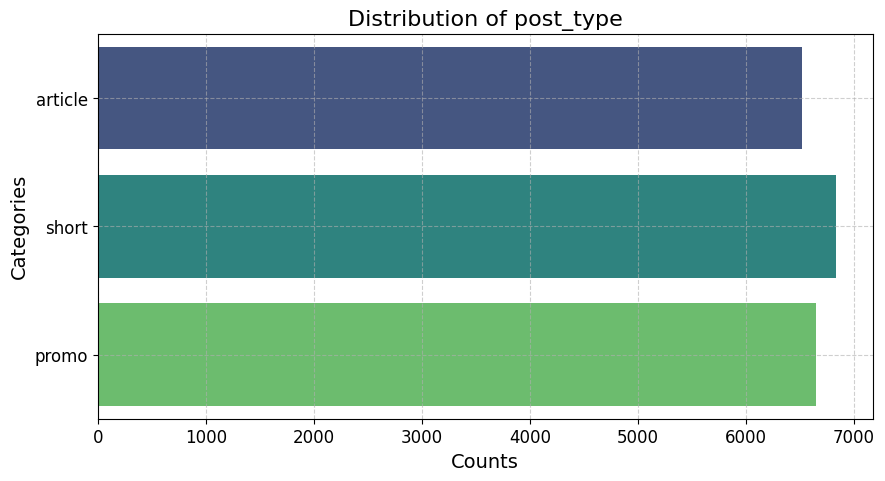

No missing values in post_type.



In [15]:
analyse_categorical_features(posts_df_cleaned_rows)

### Conclusion:

There are no missing values in categorical features in both datasets. Number of rows with same categorical feature are approximately the same.

## Numerical features analysis:

Displaying counts and number of empty values for numerical features (excluding `post_id`)

In [16]:
analyse_numerical_features(group_df_cleaned_rows, cols_to_remove=["post_id"])

No numerical features exists in dataset.


Descriptive Statistics for reach:
count     20000.000000
mean     104710.528550
std      239586.822023
min          50.000000
25%         924.000000
50%        3864.000000
75%        8796.000000
max      999755.000000
Name: reach, dtype: float64




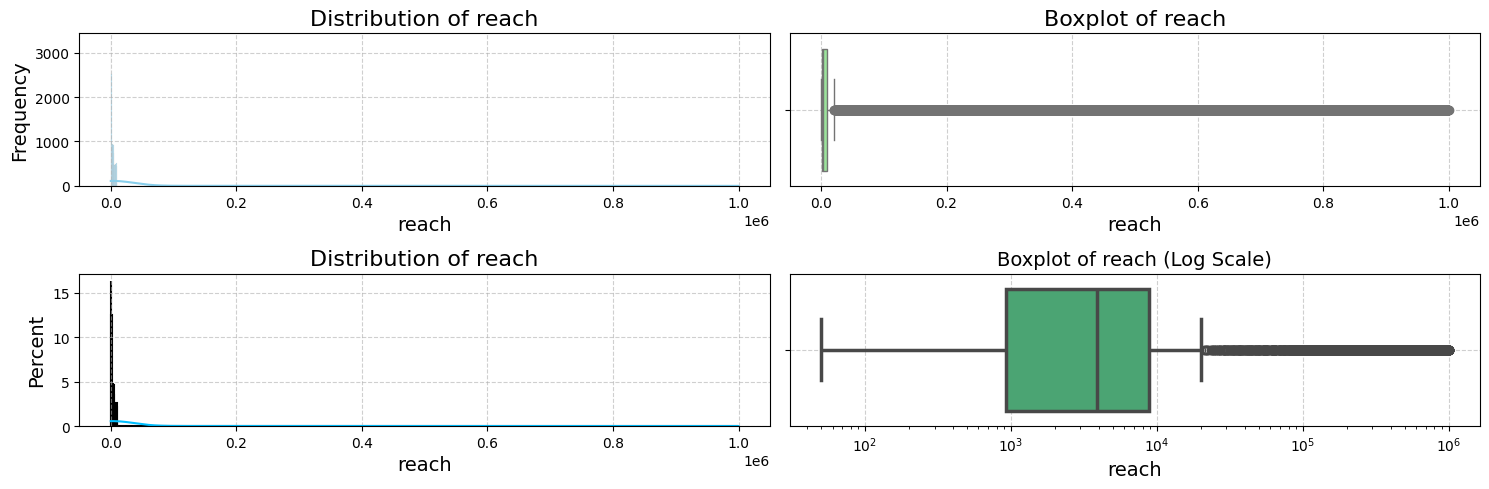

No missing values in reach.

Descriptive Statistics for click:
count    20000.000000
mean      5211.614550
std      14545.544333
min          0.000000
25%         30.000000
50%        135.000000
75%        493.000000
max      99923.000000
Name: click, dtype: float64




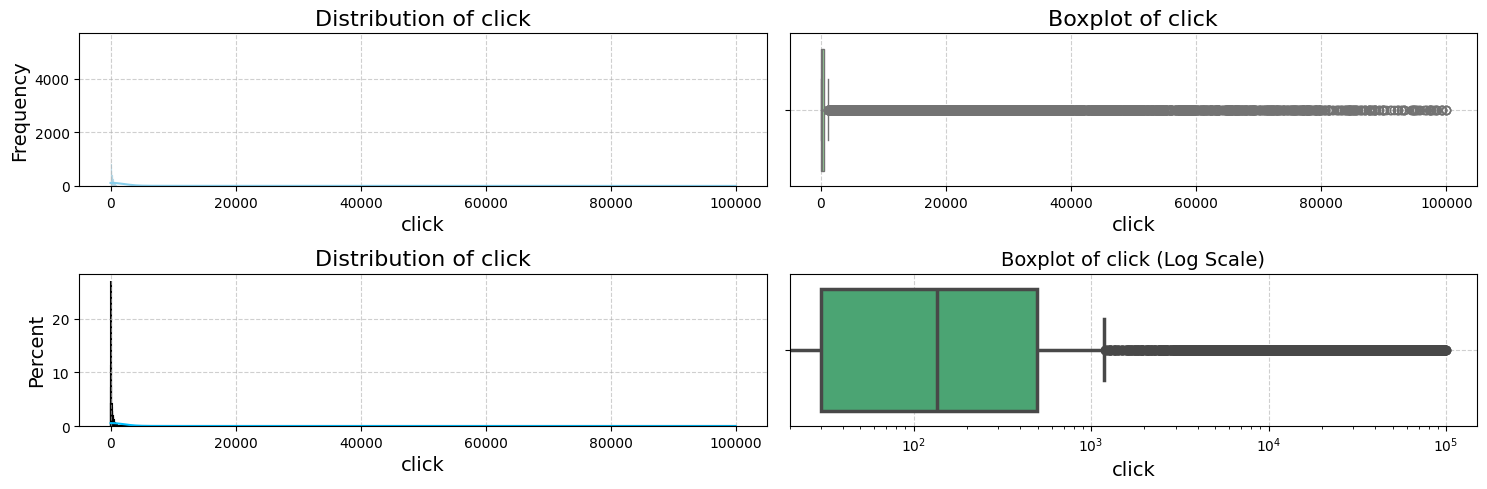

No missing values in click.

Descriptive Statistics for likes:
count    19963.000000
mean      5262.187296
std      14606.830061
min          0.000000
25%         28.000000
50%        130.000000
75%        492.500000
max      99869.000000
Name: likes, dtype: float64




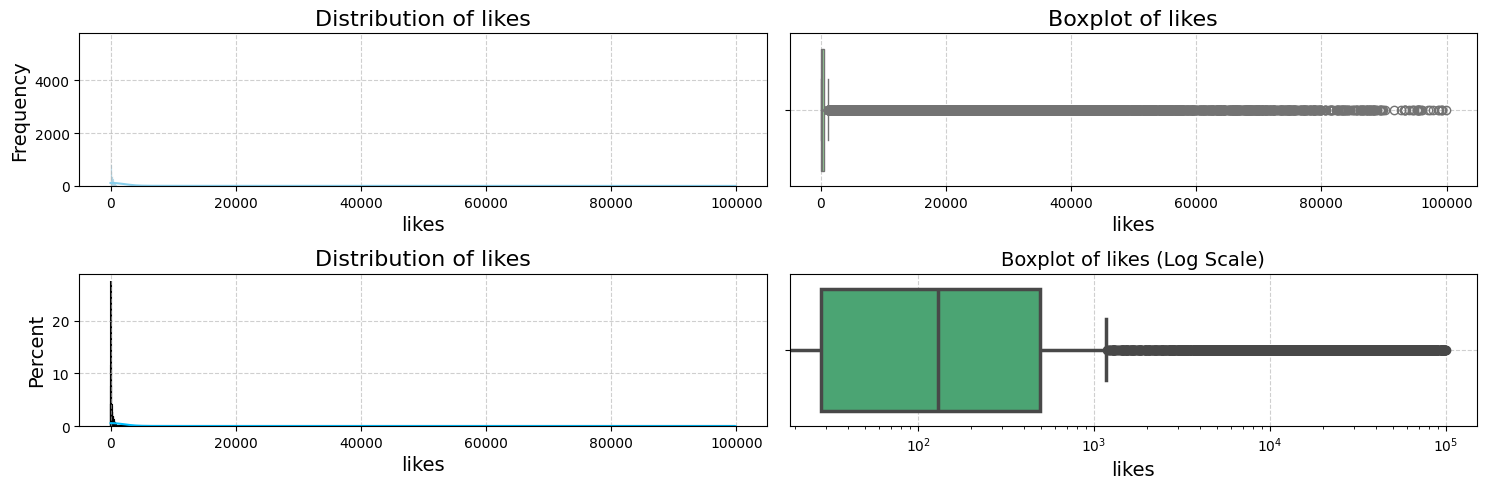

Missing values in likes: 37.

Descriptive Statistics for comments:
count    20000.000000
mean       150.252250
std         86.201864
min          0.000000
25%         76.000000
50%        151.000000
75%        224.000000
max        300.000000
Name: comments, dtype: float64




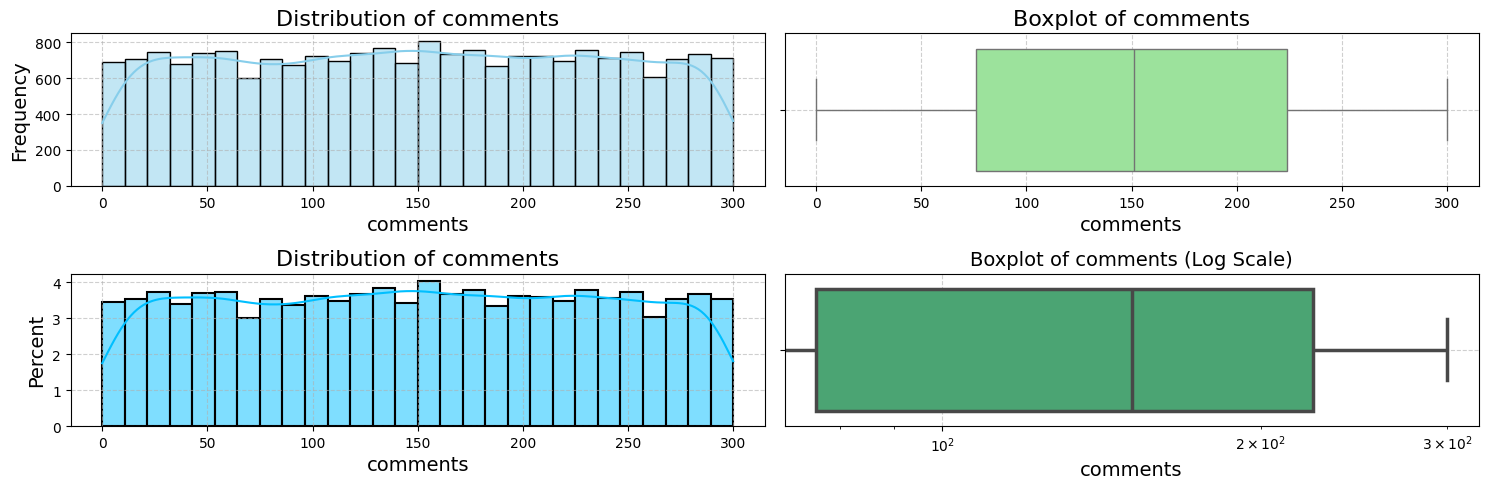

No missing values in comments.

Descriptive Statistics for share:
count    20000.000000
mean        49.655950
std         29.116266
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: share, dtype: float64




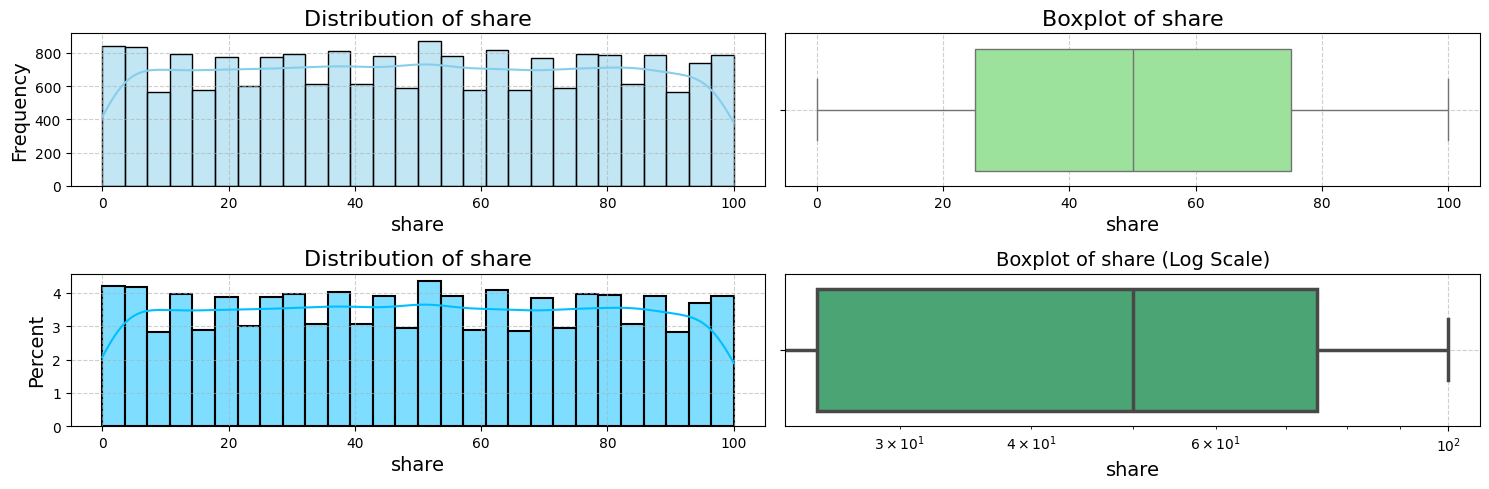

No missing values in share.

Descriptive Statistics for reaction:
count    20000.000000
mean       250.076750
std        144.919815
min          0.000000
25%        125.000000
50%        251.000000
75%        375.000000
max        500.000000
Name: reaction, dtype: float64




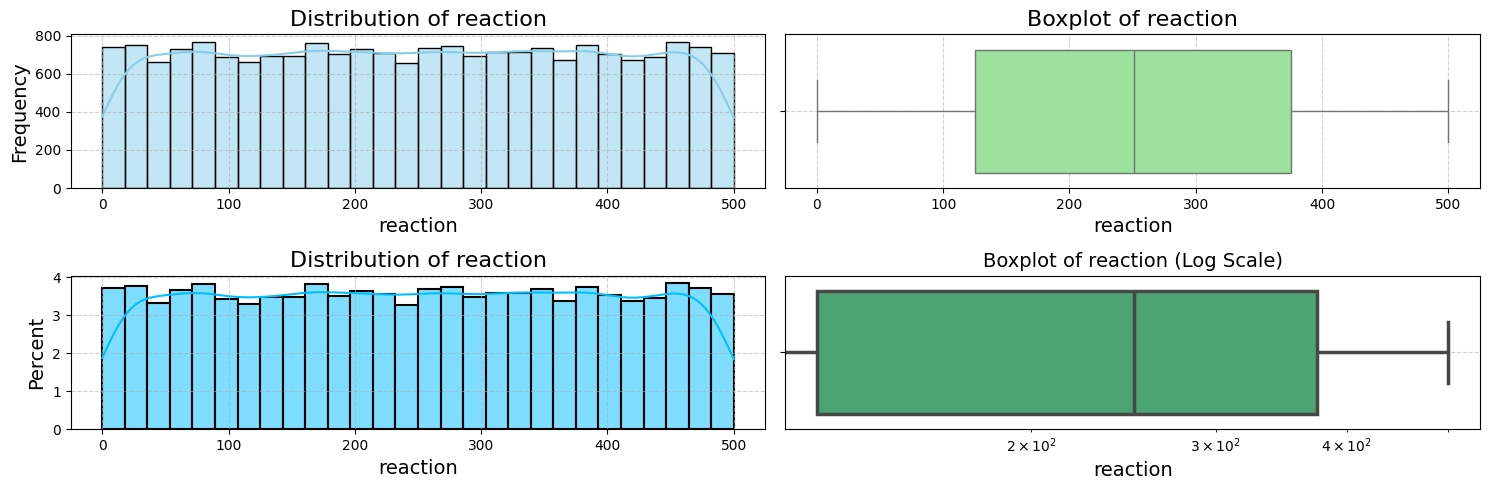

No missing values in reaction.



In [17]:
analyse_numerical_features(posts_df_cleaned_rows, cols_to_remove=["post_id"])

## Conclusion:

- No numerical features in `group_df`.
- `reach`: no values missing, no negative values, logarithmic distribution, big number of outliers with high values.
- `click`: no values missing, no negative values, logarithmic distribution, big number of outliers with high values.
- `likes`: 37 values missing, no negative values, logarithmic distribution, bit number of outliers with high values.
- `comments`: no values missing, rows count for each comments number is the almost same, no outliers.
- `share`: no values missing, rows count for each share number is the almost same, no outliers.
- `reaction`: no values missing, rows count for each reaction number is the almost same, no outliers.